<a href="https://colab.research.google.com/github/JoeAM11/MachineLearning_EM23/blob/main/Tarea03_ML_Enero_StatsCorrPruebas_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🤖 📓

## Tarea #03

Nombre :Joel Alejandro Rodarte Rivera <br>
Matrícula: 2173260 <br>

El siguiente cuaderno contiene: 

* Estadísticos descriptivos de una data frame.
  * Resultados completos y divididos por grupos. <br>
* Histogramas ajustados para mi base de datos, la cual tiene variables con distribución binomial.
* Correlación de todas las variables con sus interpretaciónes.
* Resultados gráficos de todo lo anterior.



In [74]:
! git clone https://github.com/JoeAM11/MachineLearning_EM23.git
import pandas as pd
from scipy import stats
import statistics
import matplotlib.pyplot as plt
df = pd.read_csv('/content/MachineLearning_EM23/Testing.csv') #Importar el csv desde mi repositorio en Guthub

fatal: destination path 'MachineLearning_EM23' already exists and is not an empty directory.


In [126]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10) #Para evitar que me trunque informacióno o que no despliegue tanta, segun sea necesario 

In [41]:
df = df[df.columns[::-1]] # Me es más logico tener la enfermedad en la primera columna por motivos de organización. 

In [ ]:
df.head()

In [127]:
df.sum(axis = 1) 
#Esto me podría servir para identificar cuál es la enfermedad con más síntomas. Podria despues a signarle un valor de dolor a cada síntoma y multiplicalo por su valor booleano para saber cuál es la enfermded más dolorosa.
df.sum() #Para encontrar el sítnoma más comn

<ipython-input-127-5745f159c114>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum(axis = 1)


itching                                                                 7
skin_rash                                                               8
nodal_skin_eruptions                                                    1
continuous_sneezing                                                     2
shivering                                                               1
                                              ...                        
inflammatory_nails                                                      1
blister                                                                 1
red_sore_around_nose                                                    2
yellow_crust_ooze                                                       1
prognosis               Fungal infectionAllergyGERDChronic cholestasis...
Length: 133, dtype: object

# Estadítica descriptiva

In [69]:
df.describe() #obtener los estadísticos descriptivos para todas las variables de mi df en una sola tabla

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,...,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.166667,0.190476,0.023810,0.047619,0.023810,...,0.023810,0.023810,0.023810,0.047619,0.023810
std,0.377195,0.397437,0.154303,0.215540,0.154303,...,0.154303,0.154303,0.154303,0.215540,0.154303
min,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
df_g_itching = df.groupby('prognosis') #si quisiera ver estadisticos diferenciados por enfermedad lo podría hacer
df_g_itching.describe()
#Actualmente no añade mucho valor dado que solo tengo valores de 0s y 1s  

itching                     ...  \
                                          count mean std  min  25%  ...   
prognosis                                                           ...   
(vertigo) Paroymsal  Positional Vertigo     1.0  0.0 NaN  0.0  0.0  ...   
AIDS                                        1.0  0.0 NaN  0.0  0.0  ...   
Acne                                        1.0  0.0 NaN  0.0  0.0  ...   
Alcoholic hepatitis                         1.0  0.0 NaN  0.0  0.0  ...   
Allergy                                     1.0  0.0 NaN  0.0  0.0  ...   
...                                         ...  ...  ..  ...  ...  ...   
Tuberculosis                                1.0  0.0 NaN  0.0  0.0  ...   
Typhoid                                     1.0  0.0 NaN  0.0  0.0  ...   
Urinary tract infection                     1.0  0.0 NaN  0.0  0.0  ...   
Varicose veins                              1.0  0.0 NaN  0.0  0.0  ...   
hepatitis A                                 1.0  0.0 NaN  0.0  0.0  ...   

                                        yellow_crust_ooze                      
                                                      min  25%  50%  75%  max  
prognosis                                                                      
(vertigo) Paroymsal  Positional Vertigo               0.0  0.0  0.0  0.0  0.0  
AIDS                                                  0.0  0.0  0.0  0.0  0.0  
Acne                                                  0.0  0.0  0.0  0.0  0.0  
Alcoholic hepatitis                                   0.0  0.0  0.0  0.0  0.0  
Allergy                                               0.0  0.0  0.0  0.0  0.0  
...                                                   ...  ...  ...  ...  ...  
Tuberculosis                                          0.0  0.0  0.0  0.0  0.0  
Typhoid                                               0.0  0.0  0.0  0.0  0.0  
Urinary tract infection                               0.0  0.0  0.0  0.0  0.0  
Varicose veins                                        0.0  0.0  0.0  0.0  0.0  
hepatitis A                                           0.0  0.0  0.0  0.0  0.0  

[41 rows x 1056 columns]

In [71]:
statistics.mode(df.itching) #Describe no incluye la moda por lo que lo calculamos con el la librería de statistics

0

In [73]:
df.itching.skew() # Valor positivo por lo que se interpreta que sesgo positivo es decir la mayor cantidad de elementos son mayores a la media

1.8558017135459277

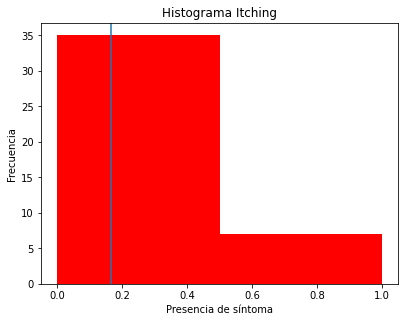

In [91]:
#histograma de una variable 
plt.figure(figsize = (6.4, 4.8)) # figura con tamaño por defecto

plt.hist(df.itching, color='red',bins = 2) # El histograma con solo dos bins
plt.axvline(x = df.itching.mean(),label = '$\\bar{x}$') # Poner una linea en el la media 

plt.title('Histograma Itching')
plt.xlabel('Presencia de síntoma') # Título del eje horizontal
plt.ylabel('Frecuencia') # Título del eje vertical

plt.show()

# Correlación

In [102]:
corr = df[['continuous_sneezing', 'shivering']].corr()
corr

,continuous_sneezing,shivering
continuous_sneezing,1.00000,0.69843
shivering,0.69843,1.00000


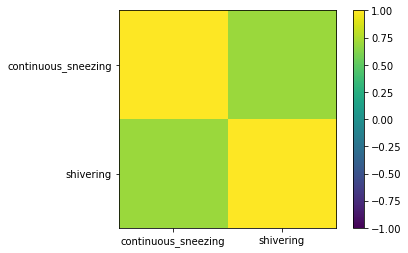

In [107]:
plt.figure()
plt.imshow(corr)
plt.xticks(ticks=[0, 1], labels=['continuous_sneezing', 'shivering']) #cambiar nombre de las x
plt.yticks(ticks=[0, 1], labels=['continuous_sneezing', 'shivering']) #Cambiar el nombre de las y 
plt.clim(vmin = -1, vmax = 1) #el rango de valores de la matriz 
plt.colorbar() # poner una barra de colores para su correlación
plt.show()

In [125]:
# Correlación de todos mis datos de manera numérica
df.corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,...,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.433861,0.349215,-0.100000,-0.069843,...,-0.069843,-0.069843,-0.069843,0.200000,-0.069843
skin_rash,0.433861,1.000000,0.321960,-0.108465,-0.075755,...,0.321960,0.321960,0.321960,0.460977,0.321960
nodal_skin_eruptions,0.349215,0.321960,1.000000,-0.034922,-0.024390,...,-0.024390,-0.024390,-0.024390,-0.034922,-0.024390
continuous_sneezing,-0.100000,-0.108465,-0.034922,1.000000,0.698430,...,-0.034922,-0.034922,-0.034922,-0.050000,-0.034922
shivering,-0.069843,-0.075755,-0.024390,0.698430,1.000000,...,-0.024390,-0.024390,-0.024390,-0.034922,-0.024390
...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,-0.069843,0.321960,-0.024390,-0.034922,-0.024390,...,1.000000,1.000000,-0.024390,-0.034922,-0.024390
inflammatory_nails,-0.069843,0.321960,-0.024390,-0.034922,-0.024390,...,1.000000,1.000000,-0.024390,-0.034922,-0.024390
blister,-0.069843,0.321960,-0.024390,-0.034922,-0.024390,...,-0.024390,-0.024390,1.000000,0.698430,1.000000
red_sore_around_nose,0.200000,0.460977,-0.034922,-0.050000,-0.034922,...,-0.034922,-0.034922,0.698430,1.000000,0.698430


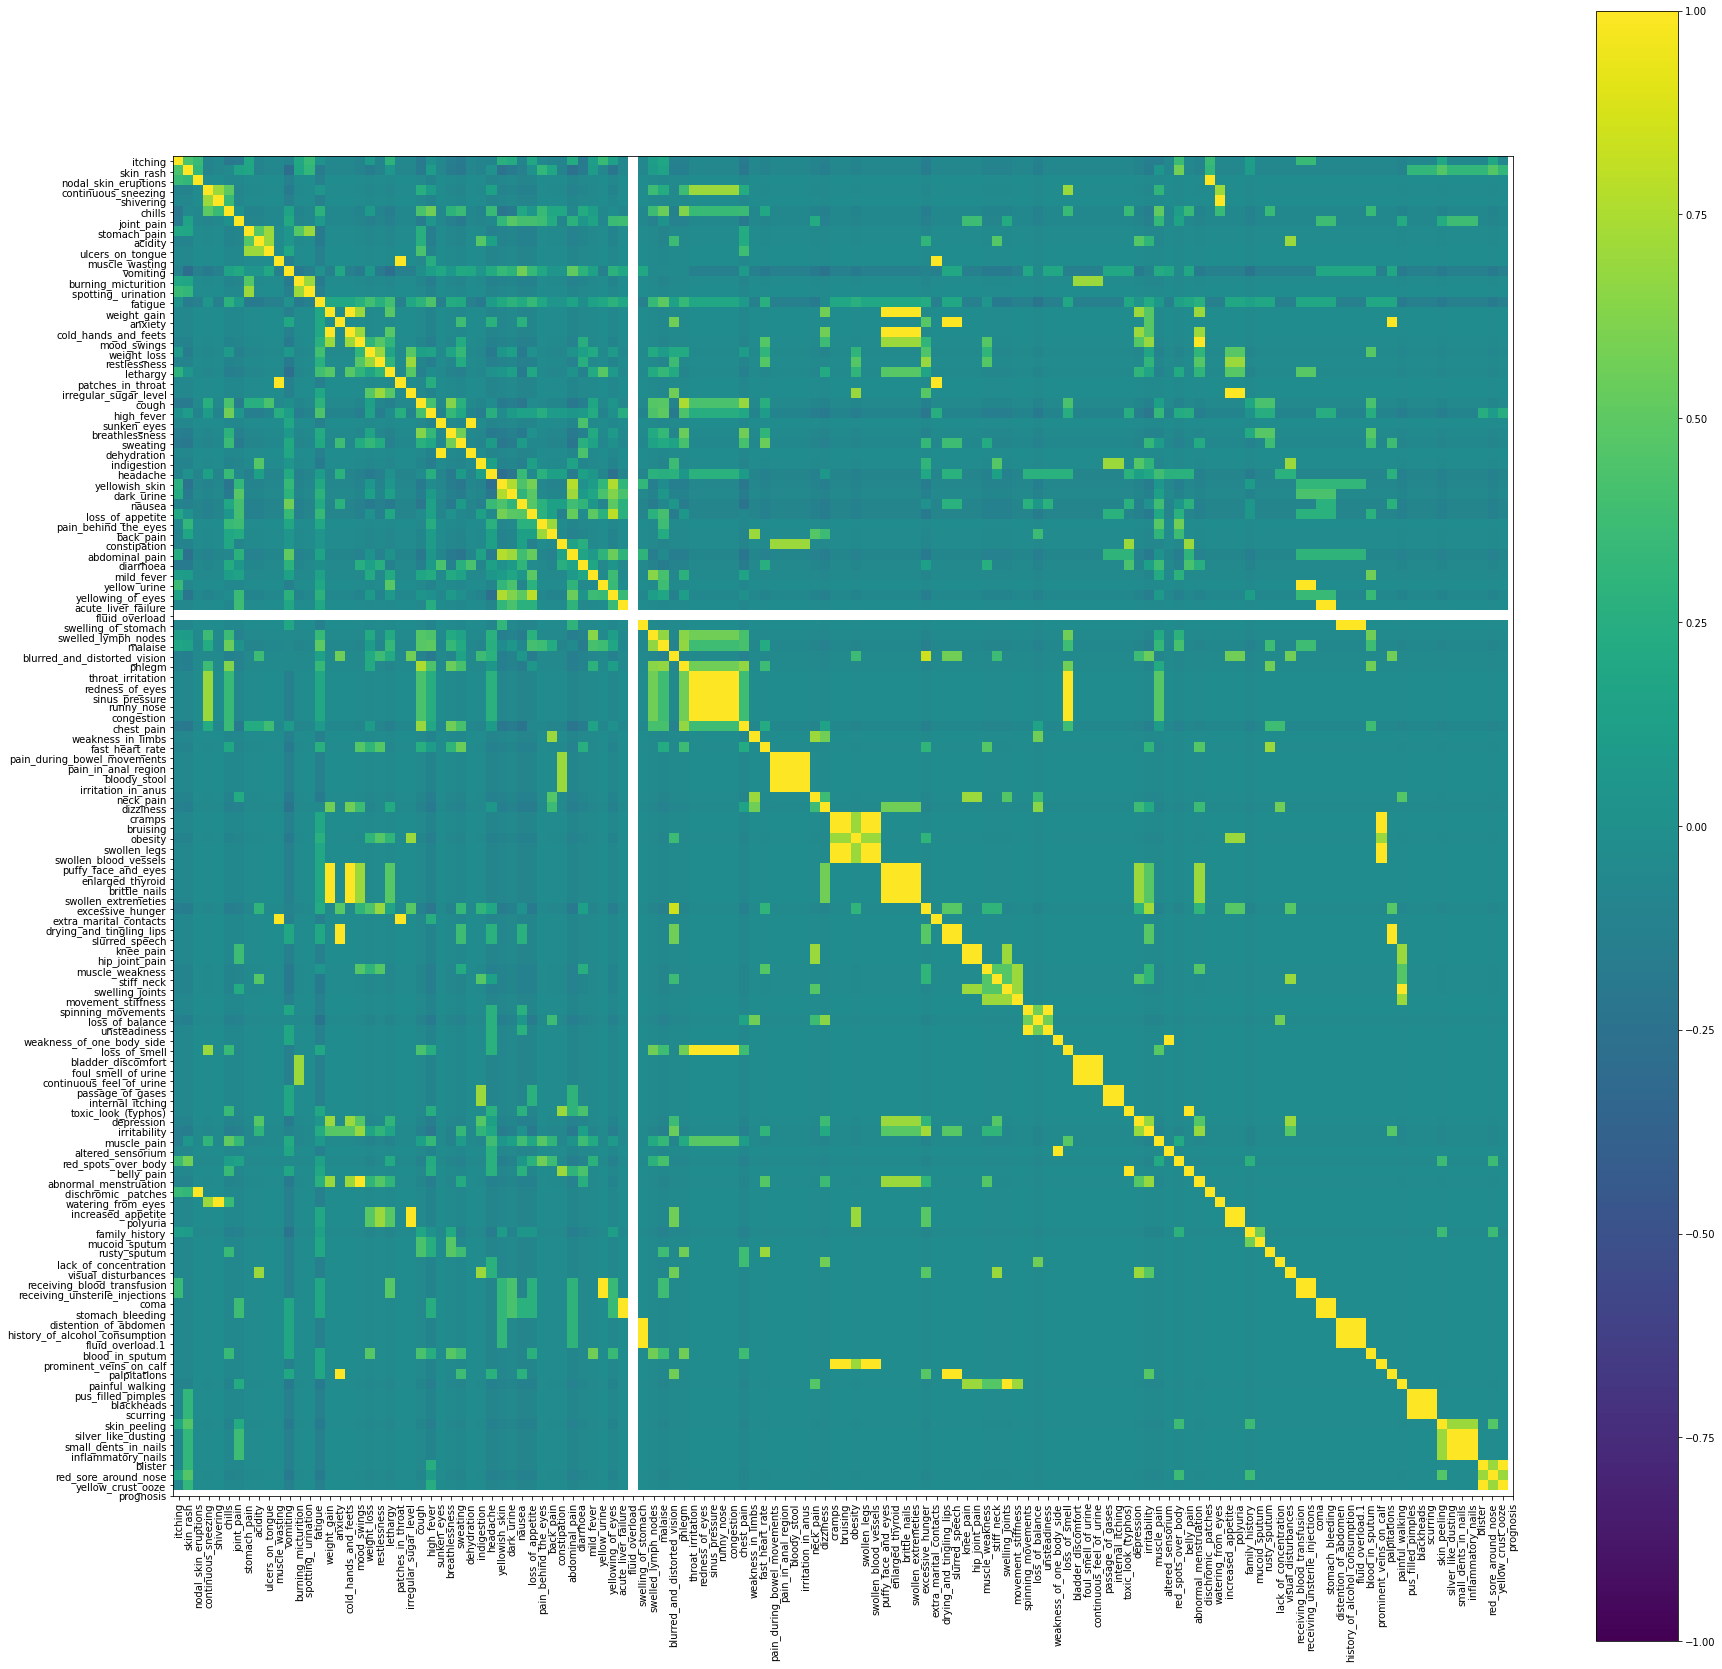

In [128]:
#Correlación de todos mis datos de manera gráfica

plt.figure(figsize = (30, 30)) # Ajustar a una imagen más grando dado tengo 133 variables 
corr_complete = df.corr()
ticks_ = list(range(len(df.columns))) # Para saber cuantas particiónes necesito, es decir cuantas variables haré la correlación 
plt.imshow(corr_complete)
plt.xticks(ticks = ticks_, labels = df.columns, rotation = 90)
plt.yticks(ticks = ticks_, labels = df.columns)
plt.clim(vmin = -1, vmax = 1)
plt.colorbar()
plt.show()

 # Con este plot descubri que la variable fluid_overload solo tiene 0s y está haciendo algo extraño con la matriz 

# Interpetaciónes de correlación 

Muy buena correlación → >.9 o más <br>
Buena correlacion → entre .7 y .9 <br>
Moderada correlación → entre .4 y .7 <br>
Baja correlación -->  entre .2 y .4 <br>
Muy baja correlación --> entre 0 y .2 <br>

<br>

#### Itching vs skin rash 
* Corr = 0.433861 
* Tipo de correlación: Positiva
* Nivel de correlación: Moderada
* Interpretación: La relación lineal entre las variables es moderada, es decir existe una relacion de .43 que puede ser explicado por la relación de las variables, el resto se atribuye a factores externos.A medida que una variable aumenta la otra aumenta también.


#### Skin Rash vs continous sneezing
* Corr = -0.108465
* Tipo de correlación: Negativa
* Nivel de correlación: Muy Baja
* Interpretación: La relación lineal entre las variables es muy baja, es decir existe una relacion de -.108 que puede ser explicado por la relación de las variables, el resto se atribuye a factores externos. A medida que una variable aumenta la otra disminuye lo cual puede indicar que la existencia de un síntoma es dificíl de encontrar si el otro está presente. 

#### Continous sneezing vs shivering
* Corr = 0.698430
* Tipo de correlación: Positiva
* Nivel de correlación: Moderada
* Interpretación: La relación lineal entre las variables es moderada, es decir existe una relacion de .69 que puede ser explicado por la relación de las variables, el resto se atribuye a factores externos.A medida que una variable aumenta la otra aumenta también.


# Prueba de hipótesis 

La correlación entre continuos sneezing y shivering fue de .69 lo cual en primera instancia indica que existe una moderada relación lineal entre las variables. El siguiente paso es comprobar si esta relación es significativamente diferente. Para ello se realiza la siguiente prueba estadística. 

* H0: El coeficiente de correlación NO ES significativamente diferente de cero. NO HAY ninguna relación lineal significativa.

* Ha: El coeficiente de correlación ES significativamente DIFERENTE de cero. EXISTE UNA RELACIÓN LINEAL SIGNIFICATIVA.

Rechazo H0 si pvalor < .05


In [146]:
lr = df.loc[:,['continuous_sneezing', 'shivering']]
lr

,continuous_sneezing,shivering
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
37,0,0
38,0,0
39,0,0
40,0,0


In [155]:
import statsmodels.api as sm

#define predictor and response variables
y = df.continuous_sneezing
x = df.shivering

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     continuous_sneezing   R-squared (uncentered):                   0.500
Model:                             OLS   Adj. R-squared (uncentered):              0.488
Method:                  Least Squares   F-statistic:                              41.00
Date:                 Sun, 29 Jan 2023   Prob (F-statistic):                    1.16e-07
Time:                         00:36:50   Log-Likelihood:                          18.896
No. Observations:                   42   AIC:                                     -35.79
Df Residuals:                       41   BIC:                                     -34.05
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [ ]:
import statsmodels.api as sm

#define predictor and response variables
y = df.continuous_sneezing
x = df.shivering

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

In [157]:
for x in range (0, 1):
    print(model.pvalues[x])

1.1553290422336939e-07


# Conclusión 


Rechazo H0 si pvalor < .05

pvalor = 1.1553290422336939e-07

Conclusión:
* Hay pruebas suficientes para concluir que existe una relación lineal significativa entre la x y la y porque el coeficiente de correlación es significativamente diferente de cero. Rechazo H0


Referencias: <br>


[12.4 Comprobación de la importancia del coeficiente de correlación](https://openstax.org/books/introducci%C3%B3n-estad%C3%ADstica/pages/12-4-comprobacion-de-la-importancia-del-coeficiente-de-correlacion#:~:text=La%20prueba%20de%20hip%C3%B3tesis%20nos,tama%C3%B1o%20de%20la%20muestra%20n.)

[How to Extract P-Values from Linear Regression in Statsmodels](https://www.statology.org/statsmodels-linear-regression-p-value/)

